In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
whr_data = pd.read_csv("data/whr_data.csv")
#whr_data = whr_data.rename(columns = {'Country Code': 'COUNTRY'})
whr_data = whr_data.drop(['Unnamed: 0'],axis =1)

#whr_data = whr_data.drop(['Year'],axis =1)
whr_data = whr_data.groupby(['Country', 'Country Code', 'Year']).mean().reset_index()
whr_data.head()

,Country,Country Code,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,Afghanistan,AFG,2014,153,3.575,0.319820,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,AFG,2015,154,3.360,0.382270,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,AFG,2016,141,3.794,0.401477,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,AFG,2017,145,3.632,0.332000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,AFG,2018,154,3.203,0.350000,0.361000,0.00000,0.158000,0.025000


In [74]:
inequality = pd.read_csv('data/processed/inc_inequality.csv', encoding='utf-8')
inequality.drop('Unnamed: 0', axis=1, inplace=True)

#inequality = inequality.drop(['Year'],axis =1)
inequality = inequality.groupby(['Country', 'Country Code', 'Year']).mean().reset_index()
inequality.head()

,Country,Country Code,Year,p50p90,p90p100,p99p100,pall
0,Afghanistan,AFG,2014,0.3977,0.4213,0.1457,3290.94780
1,Afghanistan,AFG,2015,0.3962,0.4233,0.1477,3204.31935
2,Afghanistan,AFG,2016,0.3944,0.4279,0.1474,3147.28445
3,Afghanistan,AFG,2017,0.3924,0.4315,0.1517,3115.16435
4,Afghanistan,AFG,2018,0.3924,0.4315,0.1517,3027.95350


In [76]:
unemp_crime = pd.read_csv('data/processed/unemp_crime.csv', encoding='utf-8')
unemp_crime.drop('Unnamed: 0', axis=1, inplace=True)

#unemp_crime = unemp_crime.drop(['Year'],axis =1)
unemp_crime = unemp_crime.groupby(['Country Name', 'Country Code', 'Year']).mean().reset_index()
unemp_crime.head()

,Country Name,Country Code,Year,Crime (Homicide) Score,Unemployment Score
0,Afghanistan,AFG,2000,NaN,NaN
1,Afghanistan,AFG,2001,NaN,NaN
2,Afghanistan,AFG,2002,NaN,NaN
3,Afghanistan,AFG,2003,NaN,NaN
4,Afghanistan,AFG,2004,NaN,NaN


In [77]:
suicide = pd.read_csv('data/processed/dfsuicide.csv', encoding='utf-8')
suicide[suicide['sex'] == 'both']
suicide.drop('suicides_no', axis=1, inplace=True)
suicide.drop('sex', axis=1, inplace=True)
suicide.columns = ['Country Code', 'Year', 'suicide_per_pop']

suicide = suicide.groupby(['Country Code', 'Year']).mean().reset_index()
#suicide = suicide.drop(['Year'],axis =1)
suicide.head()

,Country Code,Year,suicide_per_pop
0,ABW,2014,0.041373
1,ABW,2015,0.069030
2,AIA,2014,0.000000
3,AIA,2015,0.000000
4,AIA,2016,0.000000


In [61]:
time = pd.read_csv('data/processed/timespend.csv', encoding='utf-8')
time[time['SEX'] == 'both']
time.drop('SEX', axis=1, inplace=True)
time.columns = ['Country Code', 'Leisure', 'Other', 'Paid work or study', 'Personal care', 'Unpaid work']

time = time.groupby(['Country Code']).mean().reset_index()
time.head()

,Country Code,Leisure,Other,Paid work or study,Personal care,Unpaid work
0,AUS,282.408883,20.025539,238.073717,657.570290,241.921567
1,AUT,291.191650,7.878723,306.656223,632.136027,202.151657
2,BEL,340.409987,8.916173,236.230063,663.300337,191.105170
3,CAN,278.800943,33.772026,304.479230,637.038370,185.931430
4,CHN,228.947260,13.996530,340.254680,693.839457,162.962060


In [80]:
data = pd.merge(whr_data, inequality, on=['Country Code', 'Year'], how='right')    #, 'Year'
data.drop('Country_x', axis=1, inplace=True)

data = pd.merge(data, unemp_crime, on=['Country Code', 'Year'], how='left')
data = pd.merge(data, suicide, on=['Country Code', 'Year'], how='left')
#data = pd.merge(data, time, on=['Country Code'], how='left')

data.head()

,Country Code,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Country_y,p50p90,p90p100,p99p100,pall,Country Name,Crime (Homicide) Score,Unemployment Score,suicide_per_pop
0,AFG,2014,153.0,3.575,0.319820,0.303350,0.23414,0.365100,0.097190,Afghanistan,0.3977,0.4213,0.1457,3290.94780,Afghanistan,NaN,9.96,NaN
1,AFG,2015,154.0,3.360,0.382270,0.173440,0.16430,0.312680,0.071120,Afghanistan,0.3962,0.4233,0.1477,3204.31935,Afghanistan,9.783922,NaN,NaN
2,AFG,2016,141.0,3.794,0.401477,0.180747,0.10618,0.311871,0.061158,Afghanistan,0.3944,0.4279,0.1474,3147.28445,Afghanistan,6.551163,NaN,NaN
3,AFG,2017,145.0,3.632,0.332000,0.255000,0.08500,0.191000,0.036000,Afghanistan,0.3924,0.4315,0.1517,3115.16435,Afghanistan,6.678401,17.57,NaN
4,AFG,2018,154.0,3.203,0.350000,0.361000,0.00000,0.158000,0.025000,Afghanistan,0.3924,0.4315,0.1517,3027.95350,Afghanistan,6.655561,NaN,NaN


<AxesSubplot:>

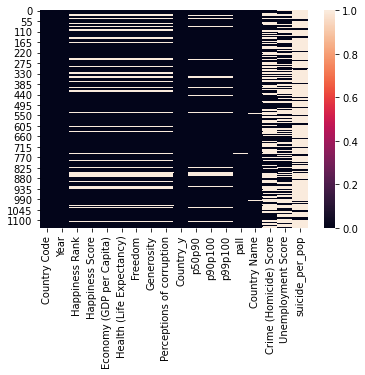

In [87]:
sns.heatmap(data.isna())

In [51]:
data.to_csv('data/processed/whr_combined.csv')

# Legatum

In [88]:
prosperity = pd.read_csv('data/processed/Legatum_Scores_and_Pillars.csv')
prosperity = prosperity.drop(['Unnamed: 0'],axis =1)

prosperity = prosperity.groupby(['Country Code']).mean().reset_index()
prosperity = prosperity.drop(['Year'],axis =1)
prosperity.head()

,Country Code,Score,Economic Quality,Education,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,Natural Environment,Personal Freedom,Safety and Security,Social Capital
0,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.700000,24.957143,42.564286,36.657143,28.014286,33.785714
1,AGO,37.751044,38.535714,25.942857,29.728571,31.392857,48.857143,26.142857,39.207143,26.078571,50.950000,30.464286,61.264286,44.435714
2,ALB,57.300581,44.314286,66.442857,51.257143,48.914286,73.550000,51.657143,71.957143,51.171429,58.042857,55.035714,72.778571,42.507143
3,ARE,65.241640,62.050000,68.628571,70.642857,59.628571,76.035714,66.250000,85.985714,72.357143,50.057143,31.642857,81.692857,57.914286
4,ARG,58.758498,45.442857,69.328571,41.985714,48.250000,76.885714,47.757143,81.821429,45.764286,60.300000,71.650000,68.664286,47.235714


In [89]:
data = pd.merge(prosperity, inequality, on=['Country Code'], how='right')   # , 'Year'
#data.drop('Country_x', axis=1, inplace=True)

data = pd.merge(data, unemp_crime, on=['Country Code'], how='left')
data = pd.merge(data, suicide, on=['Country Code'], how='left')

data.head()

,Country Code,Score,Economic Quality,Education,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,...,p50p90,p90p100,p99p100,pall,Country Name,Year_y,Crime (Homicide) Score,Unemployment Score,Year,suicide_per_pop
0,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.7,24.957143,...,0.3977,0.4213,0.1457,3290.9478,Afghanistan,2000.0,NaN,NaN,NaN,NaN
1,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.7,24.957143,...,0.3977,0.4213,0.1457,3290.9478,Afghanistan,2001.0,NaN,NaN,NaN,NaN
2,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.7,24.957143,...,0.3977,0.4213,0.1457,3290.9478,Afghanistan,2002.0,NaN,NaN,NaN,NaN
3,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.7,24.957143,...,0.3977,0.4213,0.1457,3290.9478,Afghanistan,2003.0,NaN,NaN,NaN,NaN
4,AFG,34.130492,33.978571,26.278571,43.478571,29.871429,46.407143,28.864286,34.7,24.957143,...,0.3977,0.4213,0.1457,3290.9478,Afghanistan,2004.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

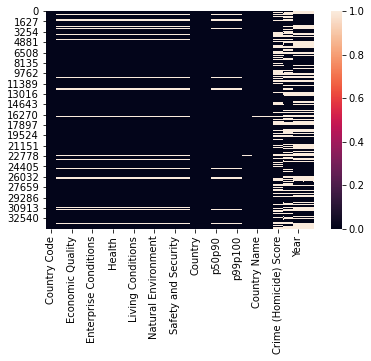

In [92]:
sns.heatmap(data.isna())

In [58]:
data.to_csv('data/processed/legatus_mixed.csv')